In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [161]:
mat = pd.read_csv("student-mat.csv")
por = pd.read_csv("student-por.csv")

data = pd.concat([mat, por])
data["avg_G"] = (data["G1"] + data["G2"]) / 2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,10.5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,11.5
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,10.0


In [3]:
plt.rc('font', family='NanumGothic')

## 공부시간별 알콜소비량

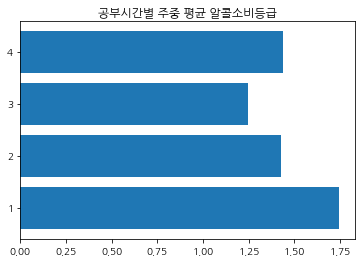

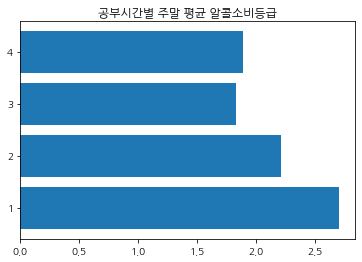

In [105]:
data.groupby("studytime")["Dalc"].mean()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["Dalc"].mean().values)
plt.yticks(y, data.groupby("studytime")["Dalc"].sum().index)
plt.title("공부시간별 주중 평균 알콜소비등급")
plt.show()

data.groupby("studytime")["Walc"].mean()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["Walc"].mean().values)
plt.yticks(y, data.groupby("studytime")["Walc"].sum().index)
plt.title("공부시간별 주말 평균 알콜소비등급")
plt.show()

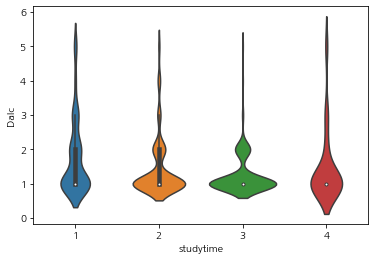

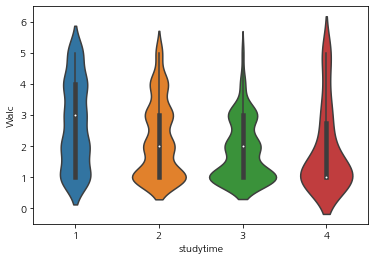

In [84]:
sns.violinplot(data=data, x="studytime", y="Dalc")
plt.show()
sns.violinplot(data=data, x="studytime", y="Walc")
plt.show()

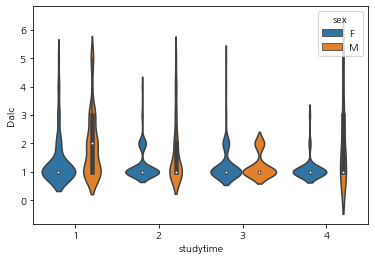

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


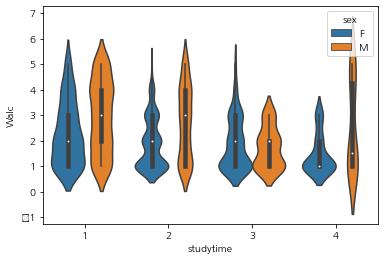

In [85]:
sns.violinplot(data=data, x="studytime", y="Dalc", hue="sex")
plt.show()
sns.violinplot(data=data, x="studytime", y="Walc", hue="sex")
plt.show()

## 공부를 많이 하는 아이들의 평균 알콜 소비량이 공부를 조금하는 아이들의 평균 알콜 소비량 보다 더 높다
## 공부를 많이 하는 아이들의 평균 알콜 소비량이 더 많은 이유는 공부를 많이 하는 아이들중 남성의 알콜소비량이 매우 극단적으로 나타나기 때문으로 해석된다

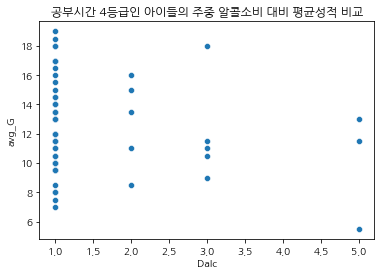

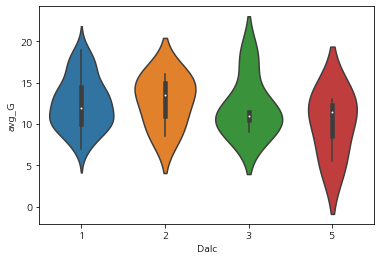

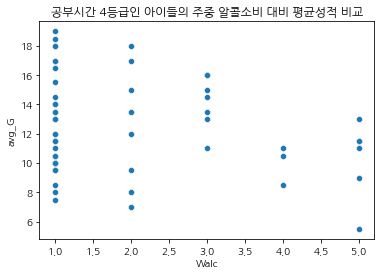

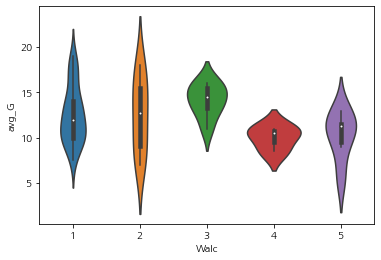

level_0                1
index                 66
school                GP
sex                    M
age                   15
address                U
famsize              GT3
Pstatus                A
Medu                   4
Fedu                   4
Mjob               other
Fjob            services
reason        reputation
guardian          mother
traveltime             1
studytime              4
failures               0
schoolsup             no
famsup               yes
paid                  no
activities           yes
nursery               no
higher               yes
internet             yes
romantic             yes
famrel                 1
freetime               3
goout                  3
Dalc                   5
Walc                   5
health                 3
absences               4
G1                    13
G2                    13
G3                    12
avg_G               13.0
Name: 0, dtype: object
level_0               28
index                 66
school                GP
se

In [162]:
s4 = data[data["studytime"] == 4].reset_index()
s4
plt.title("공부시간 4등급인 아이들의 주중 알콜소비 대비 평균성적 비교")
sns.scatterplot(data=s4, x="Dalc", y="avg_G")
plt.show()
sns.violinplot(data=s4, x="Dalc", y="avg_G")
plt.show()
print()
print()
print()
plt.title("공부시간 4등급인 아이들의 주중 알콜소비 대비 평균성적 비교")
sns.scatterplot(data=s4, x="Walc", y="avg_G")
plt.show()
sns.violinplot(data=s4, x="Walc", y="avg_G")
plt.show()

for i in range(3):
    print(s4[(s4["Dalc"] == 5) & (s4["avg_G"] > 2)].reset_index().loc[i])

## 공부시간별 성적

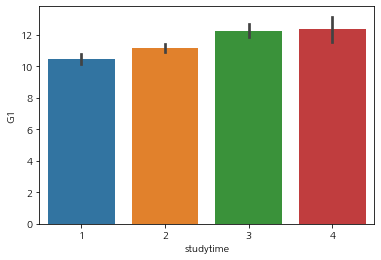

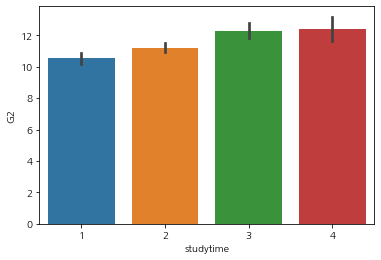

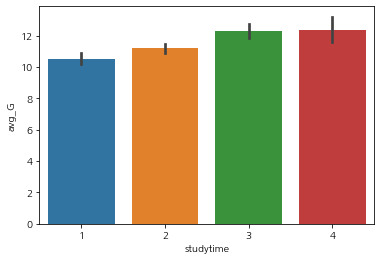

In [163]:
sns.barplot(data=data, x="studytime", y="G1")
plt.show()
sns.barplot(data=data, x="studytime", y="G2")
plt.show()
sns.barplot(data=data, x="studytime", y="avg_G")
plt.show()

### 공부시간과 성적은 비례관계이다
# 하지만 공부시간과 알콜소비량은 비례하지 않는다

# 아이들이 시간을 어떻게 소비하는지에 대한 비교

### activity를 안하는 아이들과 하는 아이들이 공부를 얼마나 하는지에 대한 비교

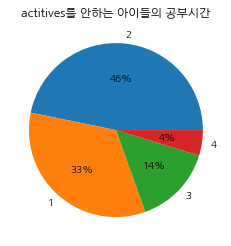

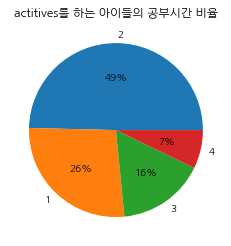

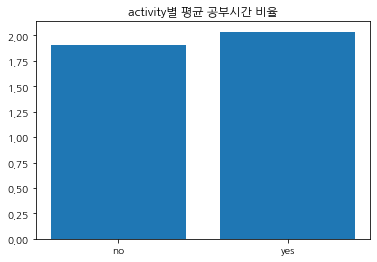

In [56]:
data.groupby("activities")["studytime"].value_counts()
x = data.groupby("activities")["studytime"].value_counts()["no"].values
labels = data.groupby("activities")["studytime"].value_counts()["no"].index
plt.pie(x=x, labels=labels, autopct="%d%%")
plt.title("actitives를 안하는 아이들의 공부시간")
plt.show()

x = data.groupby("activities")["studytime"].value_counts()["yes"].values
labels = data.groupby("activities")["studytime"].value_counts()["no"].index
plt.pie(x=x, labels=labels, autopct="%d%%")
plt.title("actitives를 하는 아이들의 공부시간 비율")
plt.show()

x = np.arange(len(avg_act))
avg_act = data.groupby("activities")["studytime"].mean()
plt.bar(x=x, height=avg_act.values)
plt.xticks(x, avg_act.index)
plt.title("activity별 평균 공부시간 비율")
plt.show()

### activiy를 안하는 아이들이 공부를 더 안한다

## 아이들은 시간을 어떻게 쓰는가????

### 공부시간별 시간소비에 관한 비교

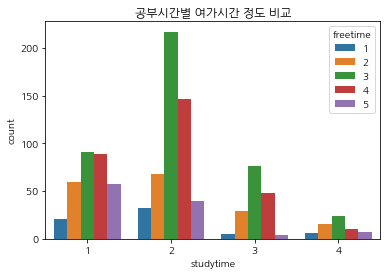

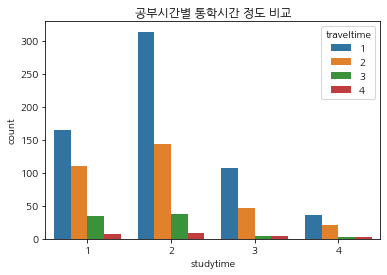

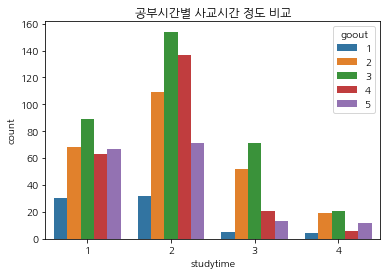

In [104]:
sns.countplot(data=data, x="studytime", hue="freetime")
plt.title("공부시간별 여가시간 정도 비교")
plt.show()

sns.countplot(data=data, x="studytime", hue="traveltime")
plt.title("공부시간별 통학시간 정도 비교")
plt.show()

sns.countplot(data=data, x="studytime", hue="goout")
plt.title("공부시간별 사교시간 정도 비교")
plt.show()

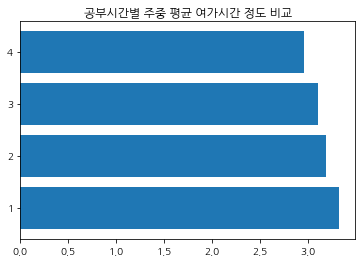

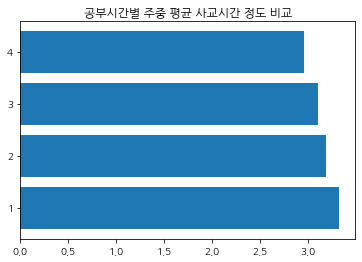

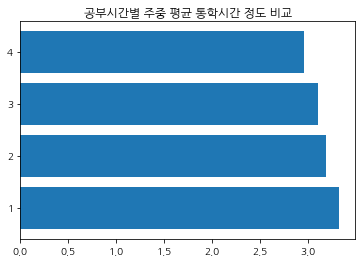

In [86]:
data.groupby("studytime")["freetime"].mean()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["freetime"].mean().values)
plt.yticks(y, data.groupby("studytime")["freetime"].sum().index)
plt.title("공부시간별 주중 평균 여가시간 정도 비교")
plt.show()

data.groupby("studytime")["goout"].mean()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["freetime"].mean().values)
plt.yticks(y, data.groupby("studytime")["freetime"].sum().index)
plt.title("공부시간별 주중 평균 사교시간 정도 비교")
plt.show()

data.groupby("studytime")["traveltime"].mean()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["freetime"].mean().values)
plt.yticks(y, data.groupby("studytime")["freetime"].sum().index)
plt.title("공부시간별 주중 평균 통학시간 정도 비교")
plt.show()

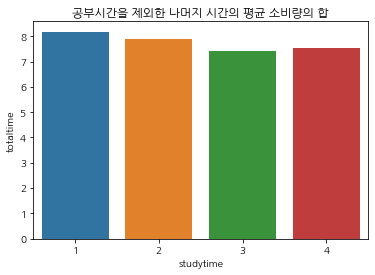

           freetime     goout  traveltime  totaltime
studytime                                           
1          3.321767  3.217666    1.637224   8.176656
2          3.186879  3.210736    1.485089   7.882704
3          3.104938  2.907407    1.407407   7.419753
4          2.951613  3.048387    1.548387   7.548387


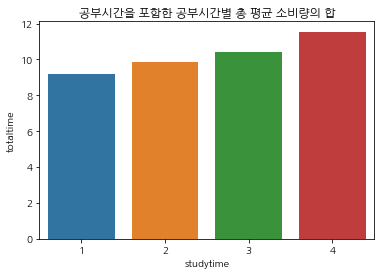

,freetime,goout,traveltime,totaltime,studytime
studytime,,,,,
1,3.321767,3.217666,1.637224,9.176656,1.0
2,3.186879,3.210736,1.485089,9.882704,2.0
3,3.104938,2.907407,1.407407,10.419753,3.0
4,2.951613,3.048387,1.548387,11.548387,4.0


In [175]:
data.groupby("studytime")["freetime"].mean()
data.groupby("studytime")["goout"].mean()
data.groupby("studytime")["traveltime"].mean()
data.groupby("studytime")["studytime"].mean()

gender_time = pd.concat([data.groupby("studytime")["freetime"].mean(), data.groupby("studytime")["goout"].mean(), data.groupby("studytime")["traveltime"].mean()], axis=1)
gender_time["totaltime"] = data.groupby("studytime")["freetime"].mean() + data.groupby("studytime")["goout"].mean() + data.groupby("studytime")["traveltime"].mean()
gender_time
sns.barplot(data=gender_time, x=gender_time.index, y="totaltime")
plt.title("공부시간을 제외한 나머지 시간의 평균 소비량의 합")
plt.show()
print(gender_time)

gender_time_temp = pd.concat([gender_time, data.groupby("studytime")["studytime"].mean()], axis=1)
gender_time_temp["totaltime"] = gender_time_temp["totaltime"] + gender_time_temp["studytime"]
gender_time_temp
sns.barplot(data=gender_time_temp, x=gender_time.index, y="totaltime")
plt.title("공부시간을 포함한 공부시간별 총 평균 소비량의 합")
plt.show()

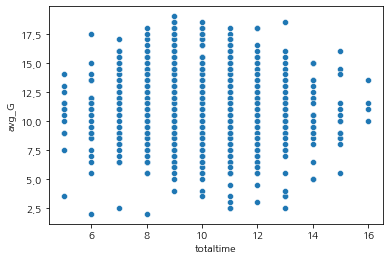

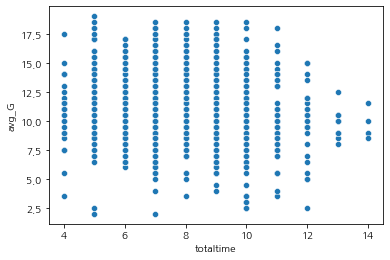

In [181]:
data["totaltime"] = data["freetime"] + data["goout"] + data["traveltime"] + data["studytime"]

sns.scatterplot(data=data, x="totaltime", y="avg_G")
plt.show()

data["totaltime"] = data["freetime"] + data["goout"] + data["traveltime"]
sns.scatterplot(data=data, x="totaltime", y="avg_G")
plt.show()

## 공부시간과 나머지 시간 소비량은 대체로 비례관계가 없다
## 그러나 공부시간을 포함한 시간 소비량은 공부를 많이할수록 더 높다

## 학업 성취 의욕(schoolsup, higher, paid)에 따른 성적과 알콜소비 비교

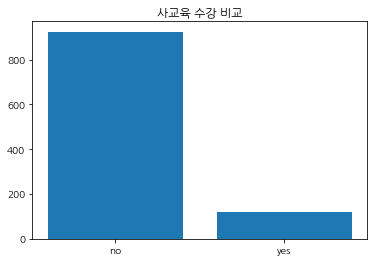

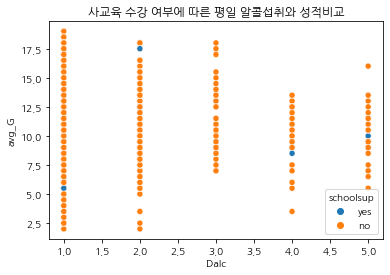

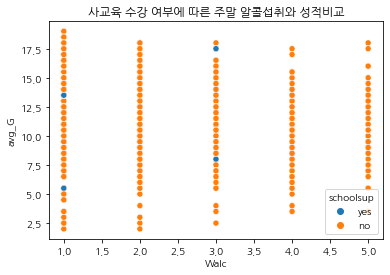

In [164]:
data["schoolsup"].value_counts()
plt.bar(x=np.arange(2), height=data["schoolsup"].value_counts().values)
plt.xticks(np.arange(2), data["schoolsup"].value_counts().index)
plt.title("사교육 수강 비교")
plt.show()

sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="schoolsup")
plt.title("사교육 수강 여부에 따른 평일 알콜섭취와 성적비교")
plt.show()

sns.scatterplot(data=data, x="Walc", y="avg_G", hue="schoolsup")
plt.title("사교육 수강 여부에 따른 주말 알콜섭취와 성적비교")
plt.show()

### 큰 연관성 없어 보임!!

## 상급학교 진학 희망 여부에 따른 성적과 알콜소비 비교

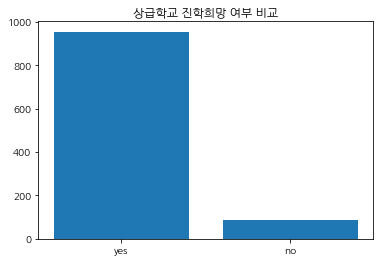

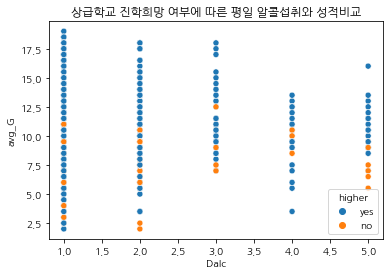

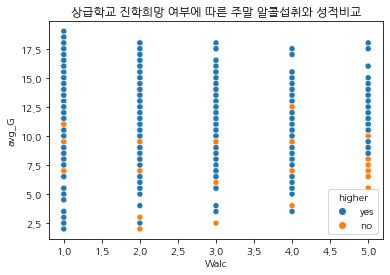

In [165]:
data["higher"].value_counts()
plt.bar(x=np.arange(2), height=data["higher"].value_counts().values)
plt.xticks(np.arange(2), data["higher"].value_counts().index)
plt.title("상급학교 진학희망 여부 비교")
plt.show()

sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="higher")
plt.title("상급학교 진학희망 여부에 따른 평일 알콜섭취와 성적비교")
plt.show()

sns.scatterplot(data=data, x="Walc", y="avg_G", hue="higher")
plt.title("상급학교 진학희망 여부에 따른 주말 알콜섭취와 성적비교")
plt.show()

### 상급학교 진학희망여부와 알콜소비는 연관성이 없어보인다
### 그러나 상급학교 진학희망여부와 성적은 비례하는 것으로 보인다

## 복수전공 여부에 따른 성적과 알콜소비 비교

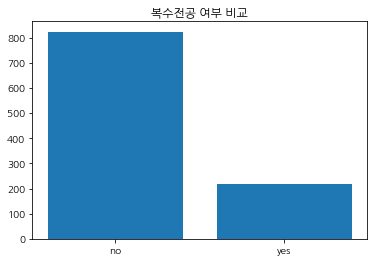

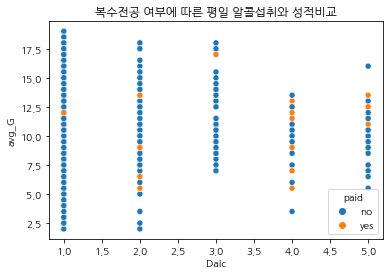

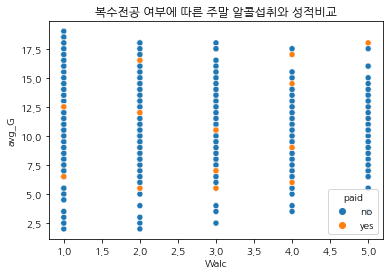

In [166]:
data["paid"].value_counts()
plt.bar(x=np.arange(2), height=data["paid"].value_counts().values)
plt.xticks(np.arange(2), data["paid"].value_counts().index)
plt.title("복수전공 여부 비교")
plt.show()

sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="paid")
plt.title("복수전공 여부에 따른 평일 알콜섭취와 성적비교")
plt.show()

sns.scatterplot(data=data, x="Walc", y="avg_G", hue="paid")
plt.title("복수전공 여부에 따른 주말 알콜섭취와 성적비교")
plt.show()

### 복수전공과 성적 알콜소비도 큰 연관성 없어보임

# 학업성취의욕(schoolsup, higher, paid)과 성적, 알콜소비는 연관성이 크지 않다
# 그러나 상급학교 희망여부는 성적과 비례한다

## 통학시간에 따른 성적, 알콜소비 비교

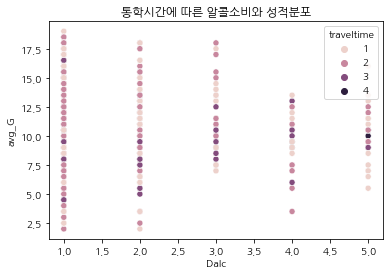

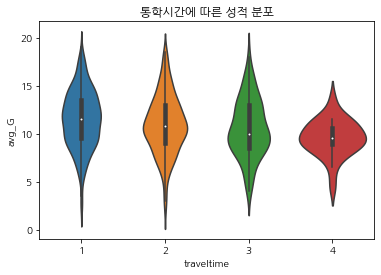

In [167]:
sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="traveltime")
plt.title("통학시간에 따른 알콜소비와 성적분포")
plt.show()

sns.violinplot(data=data, x="traveltime", y="avg_G")
plt.title("통학시간에 따른 성적 분포")
plt.show()

## 집이 아주 먼 아이들은 성적이 좋지않다

## 학교선택이유(진학 성향)에 따른 알콜섭취와 성적 비교

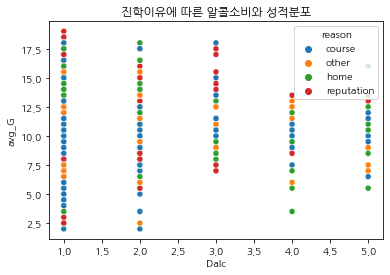

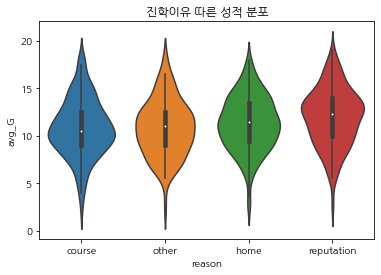

In [168]:
sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="reason")
plt.title("진학이유에 따른 알콜소비와 성적분포")
plt.show()

sns.violinplot(data=data, x="reason", y="avg_G")
plt.title("진학이유 따른 성적 분포")
plt.show()

### 학교 선택이유는 아무런 영향이 없어보인다..

## 지역에 따른 성적과 알콜소비 비교

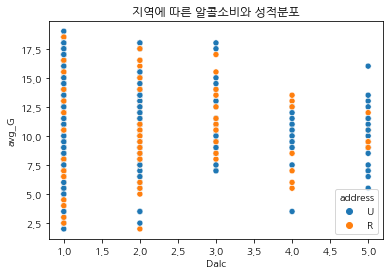

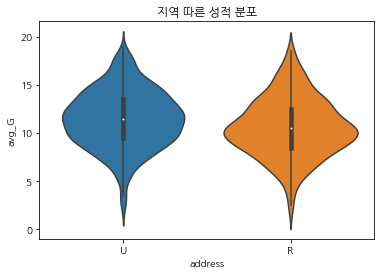

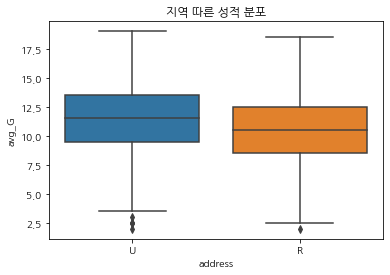

In [169]:
sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="address")
plt.title("지역에 따른 알콜소비와 성적분포")
plt.show()

sns.violinplot(data=data, x="address", y="avg_G")
plt.title("지역 따른 성적 분포")
plt.show()

sns.boxplot(data=data, x="address", y="avg_G")
plt.title("지역 따른 성적 분포")
plt.show()

### 도시지역 아이들이 시골지역아이들보다 알콜소비도 많고 성적도 평균적으로 더 높다
### 최상위권 성적은 지역에 따라 비슷하지만 상위권 성적은 도시지역 아이들이 더 많다

## 학교에 따른 성적과 알콜소비 비교

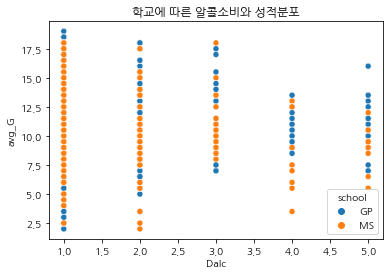

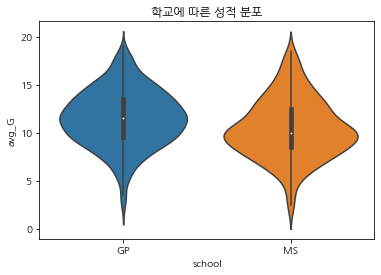

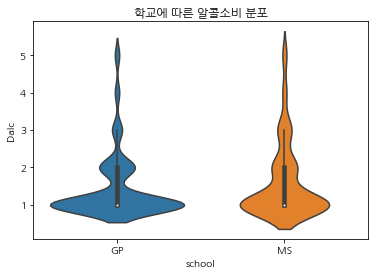

In [173]:
sns.scatterplot(data=data, x="Dalc", y="avg_G", hue="school")
plt.title("학교에 따른 알콜소비와 성적분포")
plt.show()

sns.violinplot(data=data, x="school", y="avg_G")
plt.title("학교에 따른 성적 분포")
plt.show()

sns.violinplot(data=data, x="school", y="Dalc")
plt.title("학교에 따른 알콜소비 분포")
plt.show()

## GP학교 아이들이 MS학교 아이들보다 평균 성적이 더 높고
## GP학교 아이들이 MS학교 아이들보다 알콜소비가 더 적다
